## 1. Linear Regression(Simple)
- 공부 시간에 따른 시험 점수

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset = pd.read_csv("LinearRegressionData.csv")
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [22]:
# array 형식으로 추출하기위해 .values 메서드 사용
X = dataset.iloc[:, :-1].values  # independent variable
y = dataset.iloc[:, -1].values  # dependent variable

In [24]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [25]:
# 선형회귀 모델
from sklearn.linear_model import LinearRegression
reg = LinearRegression()  # 인스턴스 객체 생성
reg.fit(X, y)  # 학습

LinearRegression()

In [26]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

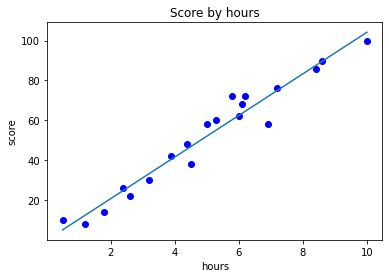

In [27]:
# 훈련 결과 시각화
plt.scatter(X, y, color="blue")  # 산점도
plt.plot(X, y_pred)  # 선 그래프
plt.title("Score by hours")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [28]:
print("9시간 공부했을 때 예상 점수:", reg.predict([[9]]))

9시간 공부했을 때 예상 점수: [93.77478776]


In [34]:
# 학습된 선형회귀 방정식 구현
m = reg.coef_  # 기울기
b = reg.intercept_  # y 절편
fx = m * 9 + b  # 직선의 방정식(선형회귀)
print(f"기울기: {m[0]}, y 절편: {b}, x(공부시간)가 9일 때 예상 점수: {fx}")

기울기: 10.443696940573442, y 절편: -0.21848470286721522, x(공부시간)가 9일 때 예상 점수: [93.77478776]


#### Dataset Split

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
dataset = pd.read_csv("LinearRegressionData.csv")
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [37]:
# array 형식으로 추출하기위해 .values 메서드 사용
X = dataset.iloc[:, :-1].values  # independent variable
y = dataset.iloc[:, -1].values  # dependent variable

In [40]:
from sklearn.model_selection import train_test_split

# 훈련 : 테스트 = 8 : 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
print(len(X_train), len(X_test))

16 4


In [45]:
X_train

array([[5.3],
       [8.4],
       [3.9],
       [6.1],
       [2.6],
       [1.8],
       [3.2],
       [6.2],
       [5. ],
       [4.4],
       [7.2],
       [5.8],
       [2.4],
       [0.5],
       [6.9],
       [6. ]])

In [42]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

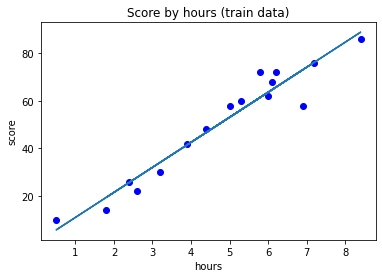

In [47]:
# 훈련 결과 시각화
plt.scatter(X_train, y_train, color="blue")  # 산점도
plt.plot(X_train, reg.predict(X_train))  # 선 그래프
plt.title("Score by hours (train data)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

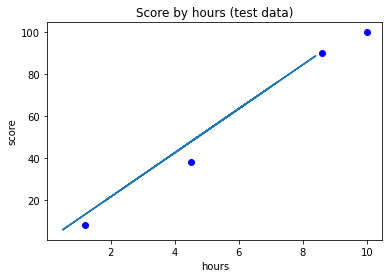

In [49]:
# 훈련 결과 시각화
plt.scatter(X_test, y_test, color="blue")  # 산점도
plt.plot(X_train, reg.predict(X_train))  # 선 그래프
plt.title("Score by hours (test data)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [51]:
reg.coef_  # 기울기

array([10.49161294])

In [52]:
reg.intercept_  # y 절편

0.6115562905169796

In [53]:
# 모델 평가
reg.score(X_test, y_test)

0.9727616474310156

#### Gradient Descent

- <img src="gradient_descent_line_graph.gif">

In [73]:
from sklearn.linear_model import SGDRegressor  # SGD: Stochastic Gradient Descent, 확률적 경사하강법

# sgd = SGDRegressor(max_iter=1000, eta0=1e-4, random_state=0, verbose=1)
# max_iter: maximum epoch (훈련 세트 최대 반복 횟수), eta0: learning rate (학습률)
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

SGDRegressor()

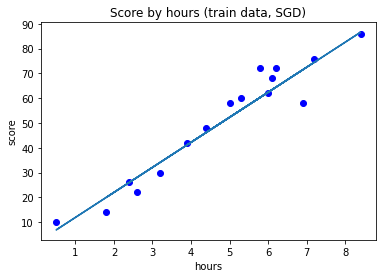

In [74]:
# 훈련 결과 시각화
plt.scatter(X_train, y_train, color="blue")  # 산점도
plt.plot(X_train, sgd.predict(X_train))  # 선 그래프
plt.title("Score by hours (train data, SGD)")
plt.xlabel("hours")
plt.ylabel("score")
plt.show()

In [75]:
sgd.coef_, sgd.intercept_

(array([10.09354274]), array([1.81066495]))

In [76]:
sgd.score(X_test, y_test)

0.9771705857613621